In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Path='/home/mgander/Atlantic/data/Viability/CCLE'

In [3]:
# Downloaded from https://depmap.org/portal/download/all/, CTRP CTD^2

In [4]:
# Experiment ID corresponds to cell line
M=pd.read_csv(f'{Path}/downloaded_data/v20.data.per_cpd_well.txt', sep='\t')
M

,experiment_id,assay_plate_barcode,raw_value_log2,bsub_value_log2,dmso_zscore_log2,cpd_conc_umol,master_cpd_id
0,1,AU050692,14.54,-0.07636,-0.2608,0.00030,1788
1,1,AU050693,14.45,-0.13200,-0.4507,0.00030,1788
2,1,AU050692,14.43,-0.18340,-0.6263,0.00061,1788
3,1,AU050693,14.24,-0.34130,-1.1650,0.00061,1788
4,1,AU050692,14.57,-0.03871,-0.1322,0.00120,1788
...,...,...,...,...,...,...,...
12470170,907,AU072323,10.53,-0.29590,-1.3230,17.00000,710154
12470171,907,AU072322,11.29,0.02746,0.1227,33.00000,710154
12470172,907,AU072323,10.58,-0.25210,-1.1270,33.00000,710154
12470173,907,AU072322,11.12,-0.14050,-0.6279,66.00000,710154


In [5]:
df0=pd.read_csv(f'{Path}/downloaded_data/v20.meta.per_compound.txt', sep='\t')
compounds=df0['cpd_name']
ids=df0['master_cpd_id']
Compound_dict={ids[i]:compounds[i] for i in range(len(ids))}

In [6]:
df1=pd.read_csv(f'{Path}/downloaded_data/v20.meta.per_experiment.txt', sep='\t')
exp_id=df1['experiment_id']
ids=df1['master_ccl_id']
Exp_dict={exp_id[i]:ids[i] for i in range(len(ids))}

In [7]:
df2=pd.read_csv(f'{Path}/downloaded_data/v20.meta.per_cell_line.txt', sep='\t')
CCLs=df2['ccl_name']
ids=df2['master_ccl_id']
CCL_dict={ids[i]:CCLs[i] for i in range(len(CCLs))}

In [8]:
M['Compound']=[Compound_dict[a] for a in M['master_cpd_id']]
M['CCL_id']=[Exp_dict[a] for a in M['experiment_id']]
M['CCL']=[CCL_dict[a] for a in M['CCL_id']]

In [9]:
M

,experiment_id,assay_plate_barcode,raw_value_log2,bsub_value_log2,dmso_zscore_log2,cpd_conc_umol,master_cpd_id,Compound,CCL_id,CCL
0,1,AU050692,14.54,-0.07636,-0.2608,0.00030,1788,CIL55,130,CAS1
1,1,AU050693,14.45,-0.13200,-0.4507,0.00030,1788,CIL55,130,CAS1
2,1,AU050692,14.43,-0.18340,-0.6263,0.00061,1788,CIL55,130,CAS1
3,1,AU050693,14.24,-0.34130,-1.1650,0.00061,1788,CIL55,130,CAS1
4,1,AU050692,14.57,-0.03871,-0.1322,0.00120,1788,CIL55,130,CAS1
...,...,...,...,...,...,...,...,...,...,...
12470170,907,AU072323,10.53,-0.29590,-1.3230,17.00000,710154,AT-406,155826,YAMATO
12470171,907,AU072322,11.29,0.02746,0.1227,33.00000,710154,AT-406,155826,YAMATO
12470172,907,AU072323,10.58,-0.25210,-1.1270,33.00000,710154,AT-406,155826,YAMATO
12470173,907,AU072322,11.12,-0.14050,-0.6279,66.00000,710154,AT-406,155826,YAMATO


In [10]:
M['Drug']=M['Compound']
M['Dose']=M['cpd_conc_umol']
M['Viability']=2**M['bsub_value_log2']
M['Source']='CTD2'
M['Duration']=72.0

In [11]:
M=M[['CCL', 'Drug', 'Dose', 'Duration', 'Viability', 'Source']]

In [13]:
M['CCL']=M['CCL'].astype('category')
M['Drug']=M['Drug'].astype('category')
C=pd.crosstab(M['CCL'], M['Drug'])

/tmp/ipykernel_30588/244956815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M['CCL']=M['CCL'].astype('category')
/tmp/ipykernel_30588/244956815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M['Drug']=M['Drug'].astype('category')


In [14]:
C

Drug,16-beta-bromoandrosterone,"1S,3R-RSL-3",3-Cl-AHPC,968,A-804598,AA-COCF3,ABT-199,ABT-737,AC55649,AGK-2,...,tubastatin A,valdecoxib,vandetanib,veliparib,vincristine,vorapaxar,vorinostat,vorinostat:carboplatin (1:1 mol/mol),vorinostat:navitoclax (4:1 mol/mol),zebularine
CCL,,,,,,,,,,,,,,,,,,,,,
2004,32,32,14,0,32,32,32,32,0,32,...,0,32,0,32,16,32,32,32,32,32
22RV1,32,32,32,32,0,32,0,32,32,18,...,32,32,32,26,32,32,32,32,32,32
2313287,32,24,30,29,0,30,0,32,32,32,...,30,32,32,26,28,30,15,20,31,32
253J,32,32,32,0,0,32,0,32,32,32,...,0,32,32,28,32,32,31,24,32,32
253JBV,32,32,32,32,0,32,0,32,32,32,...,31,32,32,27,32,32,32,24,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YD8,32,32,24,0,32,32,32,0,32,32,...,32,32,32,32,32,32,32,32,32,32
YH13,32,32,24,0,32,20,32,0,32,32,...,0,32,26,32,32,32,32,32,32,32
YKG1,0,32,28,0,0,28,32,32,32,32,...,0,32,32,32,32,0,32,32,32,32


<Axes: ylabel='Count'>

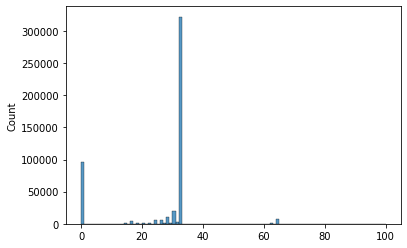

In [19]:
sns.histplot(C.values.flatten(), bins=np.linspace(0,100,101))

In [20]:
M

,CCL,Drug,Dose,Duration,Viability,Source
0,CAS1,CIL55,0.00030,72.0,0.948448,CTD2
1,CAS1,CIL55,0.00030,72.0,0.912565,CTD2
2,CAS1,CIL55,0.00061,72.0,0.880625,CTD2
3,CAS1,CIL55,0.00061,72.0,0.789330,CTD2
4,CAS1,CIL55,0.00120,72.0,0.973525,CTD2
...,...,...,...,...,...,...
12470170,YAMATO,AT-406,17.00000,72.0,0.814564,CTD2
12470171,YAMATO,AT-406,33.00000,72.0,1.019216,CTD2
12470172,YAMATO,AT-406,33.00000,72.0,0.839673,CTD2
12470173,YAMATO,AT-406,66.00000,72.0,0.907205,CTD2


In [21]:
12470175/387258

32.201206947306446

In [23]:
M[(M['CCL']=='YAMATO')&(M['Drug']=='AT-406')]

,CCL,Drug,Dose,Duration,Viability,Source
12470143,YAMATO,AT-406,0.0020,72.0,1.032842,CTD2
12470144,YAMATO,AT-406,0.0020,72.0,0.943706,CTD2
12470145,YAMATO,AT-406,0.0041,72.0,1.103204,CTD2
12470146,YAMATO,AT-406,0.0041,72.0,1.055027,CTD2
12470147,YAMATO,AT-406,0.0081,72.0,1.093005,CTD2
12470148,YAMATO,AT-406,0.0081,72.0,1.076762,CTD2
12470149,YAMATO,AT-406,0.0160,72.0,1.099311,CTD2
12470150,YAMATO,AT-406,0.0160,72.0,1.174788,CTD2
12470151,YAMATO,AT-406,0.0320,72.0,1.153885,CTD2
12470152,YAMATO,AT-406,0.0320,72.0,1.014452,CTD2


In [24]:
C

Drug,16-beta-bromoandrosterone,"1S,3R-RSL-3",3-Cl-AHPC,968,A-804598,AA-COCF3,ABT-199,ABT-737,AC55649,AGK-2,...,tubastatin A,valdecoxib,vandetanib,veliparib,vincristine,vorapaxar,vorinostat,vorinostat:carboplatin (1:1 mol/mol),vorinostat:navitoclax (4:1 mol/mol),zebularine
CCL,,,,,,,,,,,,,,,,,,,,,
2004,32,32,14,0,32,32,32,32,0,32,...,0,32,0,32,16,32,32,32,32,32
22RV1,32,32,32,32,0,32,0,32,32,18,...,32,32,32,26,32,32,32,32,32,32
2313287,32,24,30,29,0,30,0,32,32,32,...,30,32,32,26,28,30,15,20,31,32
253J,32,32,32,0,0,32,0,32,32,32,...,0,32,32,28,32,32,31,24,32,32
253JBV,32,32,32,32,0,32,0,32,32,32,...,31,32,32,27,32,32,32,24,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YD8,32,32,24,0,32,32,32,0,32,32,...,32,32,32,32,32,32,32,32,32,32
YH13,32,32,24,0,32,20,32,0,32,32,...,0,32,26,32,32,32,32,32,32,32
YKG1,0,32,28,0,0,28,32,32,32,32,...,0,32,32,32,32,0,32,32,32,32


In [12]:
M.to_pickle(f'{Path}/M.pkl')

In [16]:
2**(-0.07636)

0.9484476166447421

In [17]:
2**(-0.13200)

0.9125654885434519

In [18]:
# 2**bsub_value_log2 corresponds to the measured viability values, eg. see
# https://depmap.org/portal/compound/CIL55?tab=dose-curves

In [19]:
M['CCL']=M['CCL'].astype('category')
M['Drug']=M['Drug'].astype('category')
C=pd.crosstab(M['CCL'], M['Drug'])

/tmp/ipykernel_14980/244956815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M['CCL']=M['CCL'].astype('category')
/tmp/ipykernel_14980/244956815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M['Drug']=M['Drug'].astype('category')


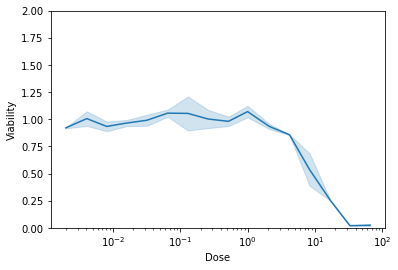

In [106]:
for i in range(100):
    cs=C.sample().T.sample(1)
    if cs.values>3:
        dr=list(cs.index)[0]
        ccl=list(cs.columns)[0]
        Ms=M[(M['CCL']==ccl)&(M['Drug']==dr)].copy()
        sns.lineplot(data=Ms, x='Dose', y='Viability')
        break
plt.ylim(0,2)
plt.xscale('log')